# Merging DataFrames with pandas

## Preparing data

### Tools for pandas data import
- pd.read_csv() for CSV files
 - dataframe = pd.read_csv(filepath)
 - dozens of optional input parameters
- Other data import tools:
 - pd.read_excel()
 - pd.read_html()
 - pd.read_json()

In [1]:
# Import pandas
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
df1 = pd.read_csv('sampledata.csv')

# Read 'Silver.csv' into a DataFrame: silver
df2 = pd.read_csv('sampledata2.csv')

# Read 'Gold.csv' into a DataFrame: gold
df3 = pd.read_csv('sampledata3.csv')

# Print the first five rows of gold
print(df1.head())

    ITEM_NO  AMC Item Number                         ITEM_DESC  Logic Count  \
0  44207509       L044207509   DRAWER, DELTA VARIO ATLAS 120MM         1335   
1  44207668       L044207668          TOILET PAPER, COTTENELLE          445   
2  44207958       L044207958          LINER, TRASH CAN, DOM SM          259   
3  44208068       L044208068                 BLANKET, YC (G&G)          371   
4  44207583       L044207583   FOAMING SOAP, SQUARE M+G 5.4 oz          523   

   Seafrigo Count  Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE  
0            2235                  900         $25,945.19            False  
1             985                  540         $17,813.36            False  
2             759                  500         $14,445.00            False  
3             811                  440         $94,467.70            False  
4             885                  362         $63,712.00            False  


### Reading DataFrames from multiple files in a loop

Notice that this approach is not restricted to working with CSV files. That is, even if your data comes in other formats, as long as pandas has a suitable data import function, you can apply a loop or comprehension to generate a list of DataFrames imported from the source files.

In [2]:
# Create the list of file names: filenames
filenames = ['sampledata.csv', 'sampledata2.csv', 'sampledata3.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

    ITEM_NO  AMC Item Number                         ITEM_DESC  Logic Count  \
0  44207509       L044207509   DRAWER, DELTA VARIO ATLAS 120MM         1335   
1  44207668       L044207668          TOILET PAPER, COTTENELLE          445   
2  44207958       L044207958          LINER, TRASH CAN, DOM SM          259   
3  44208068       L044208068                 BLANKET, YC (G&G)          371   
4  44207583       L044207583   FOAMING SOAP, SQUARE M+G 5.4 oz          523   

   Seafrigo Count  Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE  
0            2235                  900         $25,945.19            False  
1             985                  540         $17,813.36            False  
2             759                  500         $14,445.00            False  
3             811                  440         $94,467.70            False  
4             885                  362         $63,712.00            False  


### Reindexing DataFrames

## “Indexes” vs. “Indices”
- indices: many index labels within Index data structures
- indexes: many pandas Index data structures

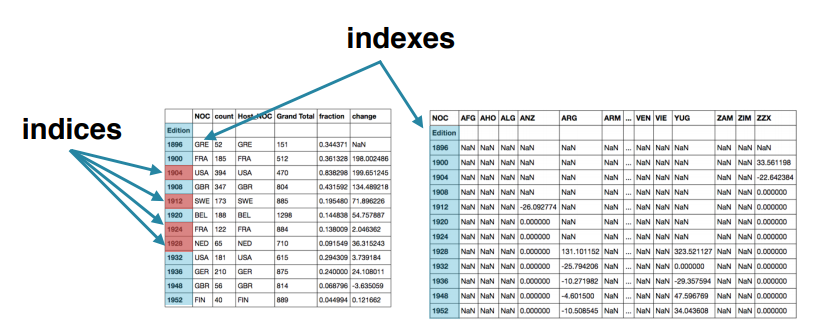

In [21]:
from IPython.display import Image

PATH1 = "C:\Users\SSari\Desktop\index.png"
Image(filename = PATH1 , width=1000, height=1000)

### Sorting DataFrame with the Index & columns

It is often useful to rearrange the sequence of the rows of a DataFrame by sorting. You don't have to implement these yourself; the principal methods for doing this are .sort_index() and .sort_values().

In [17]:
# Sort the index of weather1 in alphabetical order: weather2
df1_sort = df1.sort_index()

# Print the head of weather2

print(df1_sort.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
df1_sort_asc = df1.sort_index(ascending=False)

# Print the head of weather3
print('----------------------------------')
print(df1_sort_asc.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
df1_sort_value = df1.sort_values('Logic Count')

# Print the head 
print('----------------------------------')
print(df1_sort_value.head())

    ITEM_NO  AMC Item Number                         ITEM_DESC  Logic Count  \
0  44207509       L044207509   DRAWER, DELTA VARIO ATLAS 120MM         1335   
1  44207668       L044207668          TOILET PAPER, COTTENELLE          445   
2  44207958       L044207958          LINER, TRASH CAN, DOM SM          259   
3  44208068       L044208068                 BLANKET, YC (G&G)          371   
4  44207583       L044207583   FOAMING SOAP, SQUARE M+G 5.4 oz          523   

   Seafrigo Count  Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE  
0            2235                  900         $25,945.19            False  
1             985                  540         $17,813.36            False  
2             759                  500         $14,445.00            False  
3             811                  440         $94,467.70            False  
4             885                  362         $63,712.00            False  
----------------------------------
       ITEM_NO  AMC Item Num

### Reindexing DataFrame from a list

Sorting methods are not the only way to change DataFrame Indexes. There is also the .reindex() method.

In [19]:
year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex weather1 using the list year: weather2
df1_reindex = df1.reindex(year)

# Print weather2
print(df1_reindex.head())

# Reindex weather1 using the list year with forward-fill: weather3
df1_reindex_year = df1.reindex(year).ffill()

# Print weather3
print(df1_reindex_year.head())

    ITEM_NO  AMC Item Number  ITEM_DESC  Logic Count  Seafrigo Count  \
Jan     NaN               NaN       NaN          NaN             NaN   
Feb     NaN               NaN       NaN          NaN             NaN   
Mar     NaN               NaN       NaN          NaN             NaN   
Apr     NaN               NaN       NaN          NaN             NaN   
May     NaN               NaN       NaN          NaN             NaN   

     Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE  
Jan                  NaN                 NaN             NaN  
Feb                  NaN                 NaN             NaN  
Mar                  NaN                 NaN             NaN  
Apr                  NaN                 NaN             NaN  
May                  NaN                 NaN             NaN  
     ITEM_NO   AMC Item Number   ITEM_DESC  Logic Count  Seafrigo Count  \
Jan      NaN                NaN        NaN          NaN             NaN   
Feb      NaN                NaN        

### Reindexing using another DataFrame Index

Another common technique is to reindex a DataFrame using the Index of another DataFrame. The DataFrame .reindex() method can accept the Index of a DataFrame or Series as input. You can access the Index of a DataFrame with its .index attribute.

## Arithmetic with Series & DataFrames

### Broadcasting in arithmetic formulas

## Appending & concatenating Series

#### append()
- .append(): Series & DataFrame method
- Invocation:
 - s1.append(s2)
- Stacks rows of s2 below s1
- Method for Series & DataFrames

#### concat()
- concat(): pandas module function
- Invocation:
 - pd.concat([s1, s2, s3])
- Can stack row-wise or column-wise

#### concat() & .append()
-  Equivalence of concat() & .append():
 - result1 = pd.concat([s1, s2, s3])
 - result2 = s1.append(s2).append(s3)
- result1 == result2 elementwise

### Appending pandas Series

### Concatenating pandas Series along row axis

## Appending & concatenating DataFrames

### Appending DataFrames with ignore_index

### Concatenating pandas DataFrames along column axis

The function pd.concat() can concatenate DataFrames horizontally as well as vertically (vertical is the default). To make the DataFrames stack horizontally, you have to specify the keyword argument axis=1 or axis='columns'

### Reading multiple files to build a DataFrame

## Concatenation, keys, & MultiIndexes

### Concatenating vertically to get MultiIndexed rows

When stacking a sequence of DataFrames vertically, it is sometimes desirable to construct a MultiIndex to indicate the DataFrame from which each row originated. This can be done by specifying the keys parameter in the call to pd.concat(), which generates a hierarchical index with the labels from keys as the outermost index label. So you don't have to rename the columns of each DataFrame as you load it. Instead, only the Index column needs to be specified.

### Slicing MultiIndexed DataFrames

You are provided with the MultiIndexed DataFrame as produced at the end of the preceding exercise. Your task is to sort the DataFrame and to use the pd.IndexSlice to extract specific slices

### Concatenating horizontally to get MultiIndexed columns

It is also possible to construct a DataFrame with hierarchically indexed columns

### Concatenating DataFrames from a dict

## Outer & inner joins

#### Joins
- Joining tables: Combining rows of multiple tables
- Outer join
 - Union of index sets (all labels, no repetition)
 - Missing fields filled with NaN
- Inner join
 - Intersection of index sets (only common labels)
 
### Concatenating DataFrames with inner join

In [24]:
# Create the list of DataFrames: medal_list
con_list = [df1, df2, df3]

# Concatenate medal_list horizontally using an inner join: medals
df4 = pd.concat(con_list,keys=['first', 'second', 'third'], join='inner', axis=1)

# Print medals
print(df4)

             first                                                             \
           ITEM_NO  AMC Item Number                                 ITEM_DESC   
0         44207509       L044207509           DRAWER, DELTA VARIO ATLAS 120MM   
1         44207668       L044207668                  TOILET PAPER, COTTENELLE   
2         44207958       L044207958                  LINER, TRASH CAN, DOM SM   
3         44208068       L044208068                         BLANKET, YC (G&G)   
4         44207583       L044207583           FOAMING SOAP, SQUARE M+G 5.4 oz   
5         44207984       L044207984                             STICK, TRUVIA   
6         44206683       L044206683            TOWEL, CLEANING WIPE (CS ONLY)   
7         44206359       L044206359                ATLAS FULL MEALTRAY, WHITE   
8         44207770       L044207770                          TRAY, ATLAS FULL   
9         44207015       L044207015        SWEETENER, PINK, STIX w/DELTA LOGO   
10        44206821       L04

### Resampling & concatenating DataFrames with inner join

You'll need to use a combination of resampling and an inner join to align the index labels. You'll need an appropriate offset alias for resampling, and the method .resample() must be chained with some kind of aggregation method (.pct_change() and .last() in this case).

pandas has been imported as pd, and the DataFrames china and us have been pre-loaded, with the output of china.head() and us.head() printed in the IPython Shell.

## Merging DataFrames

### Merging on a specific column

In [29]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(df1, df2, on='ITEM_NO')

# Print merge_by_city
print(merge_by_city.head())

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(df1,df3, on='ITEM_NO')

# Print merge_by_id
print('---------------------------------------------------------------------------------')
print(merge_by_id.head())

    ITEM_NO  AMC Item Number                       ITEM_DESC_x  Logic Count  \
0  44207509       L044207509   DRAWER, DELTA VARIO ATLAS 120MM         1335   
1  44207668       L044207668          TOILET PAPER, COTTENELLE          445   
2  44207958       L044207958          LINER, TRASH CAN, DOM SM          259   
3  44208068       L044208068                 BLANKET, YC (G&G)          371   
4  44207583       L044207583   FOAMING SOAP, SQUARE M+G 5.4 oz          523   

   Seafrigo Count  Discrepancy (cases)  Discrepancy Value  ACTIVE/INACTIVE_x  \
0            2235                  900         $25,945.19              False   
1             985                  540         $17,813.36              False   
2             759                  500         $14,445.00              False   
3             811                  440         $94,467.70              False   
4             885                  362         $63,712.00              False   

                       ITEM_DESC_y  Logic Pa

### Merging on columns with non-matching labels

>>> pd.merge(revenue, managers, on='city')
Traceback (most recent call last):
    ... <text deleted> ...
    pd.merge(revenue, managers, on='city')
    ... <text deleted> ...
KeyError: 'city'
Given this, it will take a bit more work for you to join or merge on the city/branch name. You have to specify the left_on and right_on parameters in the call to pd.merge().

As before, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace. They have been printed in the IPython Shell so you can examine the columns prior to merging.

In [34]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(df1,df2,left_on='ITEM_NO',right_on='ITEM_DESC')

# Print combined
print(combined)

Empty DataFrame
Columns: [ITEM_NO_x,  AMC Item Number , ITEM_DESC_x, Logic Count, Seafrigo Count, Discrepancy (cases),  Discrepancy Value , ACTIVE/INACTIVE_x, ITEM_NO_y, ITEM_DESC_y, Logic Packs, Weber Packs, Discrepancies,  Inventory Discrepancy Value , Issue, ACTIVE/INACTIVE_y]
Index: []


### Merging on multiple columns

Another strategy to disambiguate cities with identical names is to add information on the states in which the cities are located. To this end, you add a column called state to both DataFrames from the preceding exercises. Again, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace.

## Joining DataFrames

#### Merging with left join
- Keeps all rows of the le! DF in the merged DF
- For rows in the le! DF with matches in the right DF:
 - Non-joining columns of right DF are appended to le! DF
- For rows in the le! DF with no matches in the right DF:
 - Non-joining columns are filled with nulls
 
### Joining by Index

In [36]:
df1.join(df2, lsuffix='_rev', rsuffix='_mng', how='outer')

,ITEM_NO_rev,AMC Item Number,ITEM_DESC_rev,Logic Count,Seafrigo Count,Discrepancy (cases),Discrepancy Value,ACTIVE/INACTIVE_rev,ITEM_NO_mng,ITEM_DESC_mng,Logic Packs,Weber Packs,Discrepancies,Inventory Discrepancy Value,Issue,ACTIVE/INACTIVE_mng
0,44207509,L044207509,"DRAWER, DELTA VARIO ATLAS 120MM",1335,2235,900,"$25,945.19",False,44208068,"BLANKET, YC (G&G)",461,960,499,"$103,695.12",NaN,False
1,44207668,L044207668,"TOILET PAPER, COTTENELLE",445,985,540,"$17,813.36",False,44207692,"REST, CHOPSTICK, ASIAN",14,168,154,"$34,358.02",NaN,False
2,44207958,L044207958,"LINER, TRASH CAN, DOM SM",259,759,500,"$14,445.00",False,44206900,"BAG, NC HEADSET - RED",0,175,175,"$25,200.00",NaN,False
3,44208068,L044208068,"BLANKET, YC (G&G)",371,811,440,"$94,467.70",False,44207411,"TRAY 1/3 ATLAS, YC",0,84,84,"$9,220.88",NaN,False
4,44207583,L044207583,"FOAMING SOAP, SQUARE M+G 5.4 oz",523,885,362,"$63,712.00",False,44207360,AIRSICK BAGS,258,385,127,"$6,350.00",NaN,False
5,44207984,L044207984,"STICK, TRUVIA",39,327,288,"$6,912.00",False,44207699,"PLATE, LARGE",1004,1356,352,"$6,297.98",NaN,False
6,44206683,L044206683,"TOWEL, CLEANING WIPE (CS ONLY)",718,918,200,"$8,342.05",False,44207948,"BLANKET, YC BLUE",8397,8449,52,"$6,006.00",NaN,False
7,44206359,L044206359,"ATLAS FULL MEALTRAY, WHITE",637,837,200,"$5,780.00",False,44207701,PLATE SMALL,109,250,141,"$3,796.85",NaN,False
8,44207770,L044207770,"TRAY, ATLAS FULL",272,462,190,"$37,972.00",False,44207688,"RAMEKIN, ASIAN, LARGE",0,80,80,"$3,450.24",NaN,False
9,44207015,L044207015,"SWEETENER, PINK, STIX w/DELTA LOGO",61,205,144,"$2,373.86",False,44207632,"SLEEP SUIT, LARGE XL 60/40 HEATER, 1/4",496,513,17,"$3,121.20",NaN,False


### Choosing a joining strategy

Suppose you have two DataFrames: students (with columns 'StudentID', 'LastName', 'FirstName', and 'Major') and midterm_results (with columns 'StudentID', 'Q1', 'Q2', and 'Q3' for their scores on midterm questions).

You want to combine the DataFrames into a single DataFrame grades, and be able to easily spot which students wrote the midterm and which didn't (their midterm question scores 'Q1', 'Q2', & 'Q3' should be filled with NaN values).

You also want to drop rows from midterm_results in which the StudentID is not found in students.

### Left & right merging on multiple columns

### Merging DataFrames with outer join

The merged DataFrames contain enough information to construct a DataFrame with 5 rows with all known information correctly aligned and each branch listed only once. You will try to merge the merged DataFrames on all matching keys (which computes an inner join by default). You can compare the result to an outer join and also to an outer join with restricted subset of columns as keys.

## Ordered merges

### Using merge_ordered()

### Using merge_asof()

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be use to align disparate datetime frequencies without having to first resample.

## Case Study - Summer Olympics

#### Reminder: loading & merging files
- pd.read_csv() (& its many options)
- Looping over files, e.g.,
 - [pd.read_csv(f) for f in glob('*.csv')]
- Concatenating & appending, e.g.,
 - pd.concat([df1, df2], axis=0)
 - df1.append(df2)

### Loading Olympic edition DataFrame

### Loading IOC codes DataFrame

### Building medals DataFrame

## Quantifying Performance

#### Constructing a pivot table
- Apply DataFrame pivot_table() method
 - index: column to use as index of pivot table
 - values: column(s) to aggregate
 - aggfunc: function to apply for aggregation
 - columns: categories as columns of pivot table
 
### Counting medals by country/edition in a pivot table

### Computing fraction of medals per Olympic edition

### Computing percentage change in fraction of medals won

## Reshaping and plotting

### Building hosts DataFrame

### Reshaping for analysis

### Merging to compute influence

### Plotting influence of host country

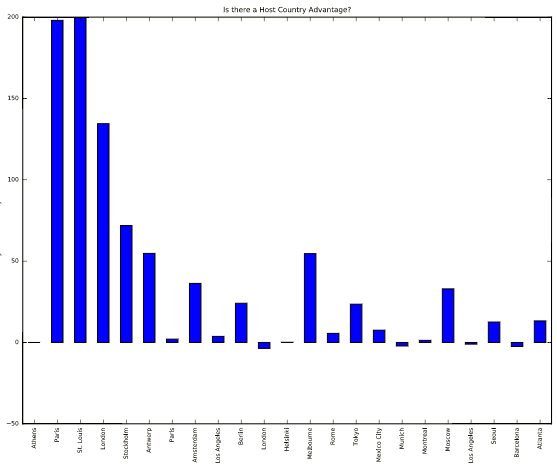

In [45]:
PATH3 = "C:\Users\SSari\Desktop\plot.png"
Image(filename = PATH3 , width=400, height=500)